In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bike_share=pd.read_csv(r"D:\Desktop\Study Material\day.csv")

In [3]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_share.shape

(730, 16)

In [5]:
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Changing the object data type to date/time data type

bike_share['dteday'] = pd.to_datetime(bike_share['dteday'])

In [8]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preperation

In [10]:
#checking for null data

100*(bike_share.isnull().sum()/len(bike_share))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
bike_share.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [12]:
#dropping the intent colunm as it is just the index

bike_share.drop(['instant'],axis=1,inplace=True)

In [13]:
#dropping casual and registered as total count is already there in the cnt column

bike_share.drop(['casual'],axis= 1,inplace=True)

bike_share.drop(['registered'],axis= 1, inplace=True)

In [14]:
#dropping dteday as we have the weekday and the month 

bike_share.drop(['dteday'],axis=1,inplace=True)

In [15]:
#bike_share.describe()
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
#changing the data in the columns

def days(x):
    return x.map({
        0:'sunday',
        1:'monday',
        2:'tuesday',
        3:'wednesday',
        4:'thursday',
        5:'firday',
        6:'saturday',
    })

bike_share[['weekday']] = bike_share[['weekday']].apply(days)

In [17]:
def month(y):
    return y.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

bike_share[['mnth']] = bike_share[['mnth']].apply(month)

In [18]:
def weather(z):
    return z.map({
        1:'Clear',
        2:'Mist',
        3:'Light Snow',
        4:'Heavy Rain',
    })
bike_share[['weathersit']]=bike_share[['weathersit']].apply(weather)

In [19]:
def seas(q):
    return q.map({
        1:'spring',
        2:'summer',
        3:'fall',
        4:'winter',
    })
bike_share[['season']]=bike_share[['season']].apply(seas)

In [20]:
bike_share['cnt']=bike_share['cnt'].astype('float')

In [21]:
bike_share['yr']=bike_share['yr'].astype('object')

In [22]:
bike_share['workingday']=bike_share['workingday'].astype('object')

In [23]:
bike_share['holiday']=bike_share['holiday'].astype('object')

In [24]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    float64
dtypes: float64(5), object(7)
memory usage: 68.6+ KB


In [25]:
bike_share.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [26]:
bike_share.shape

(730, 12)

In [27]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985.0
1,spring,0,Jan,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801.0
2,spring,0,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349.0
3,spring,0,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562.0
4,spring,0,Jan,0,firday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600.0


## Data Visualization


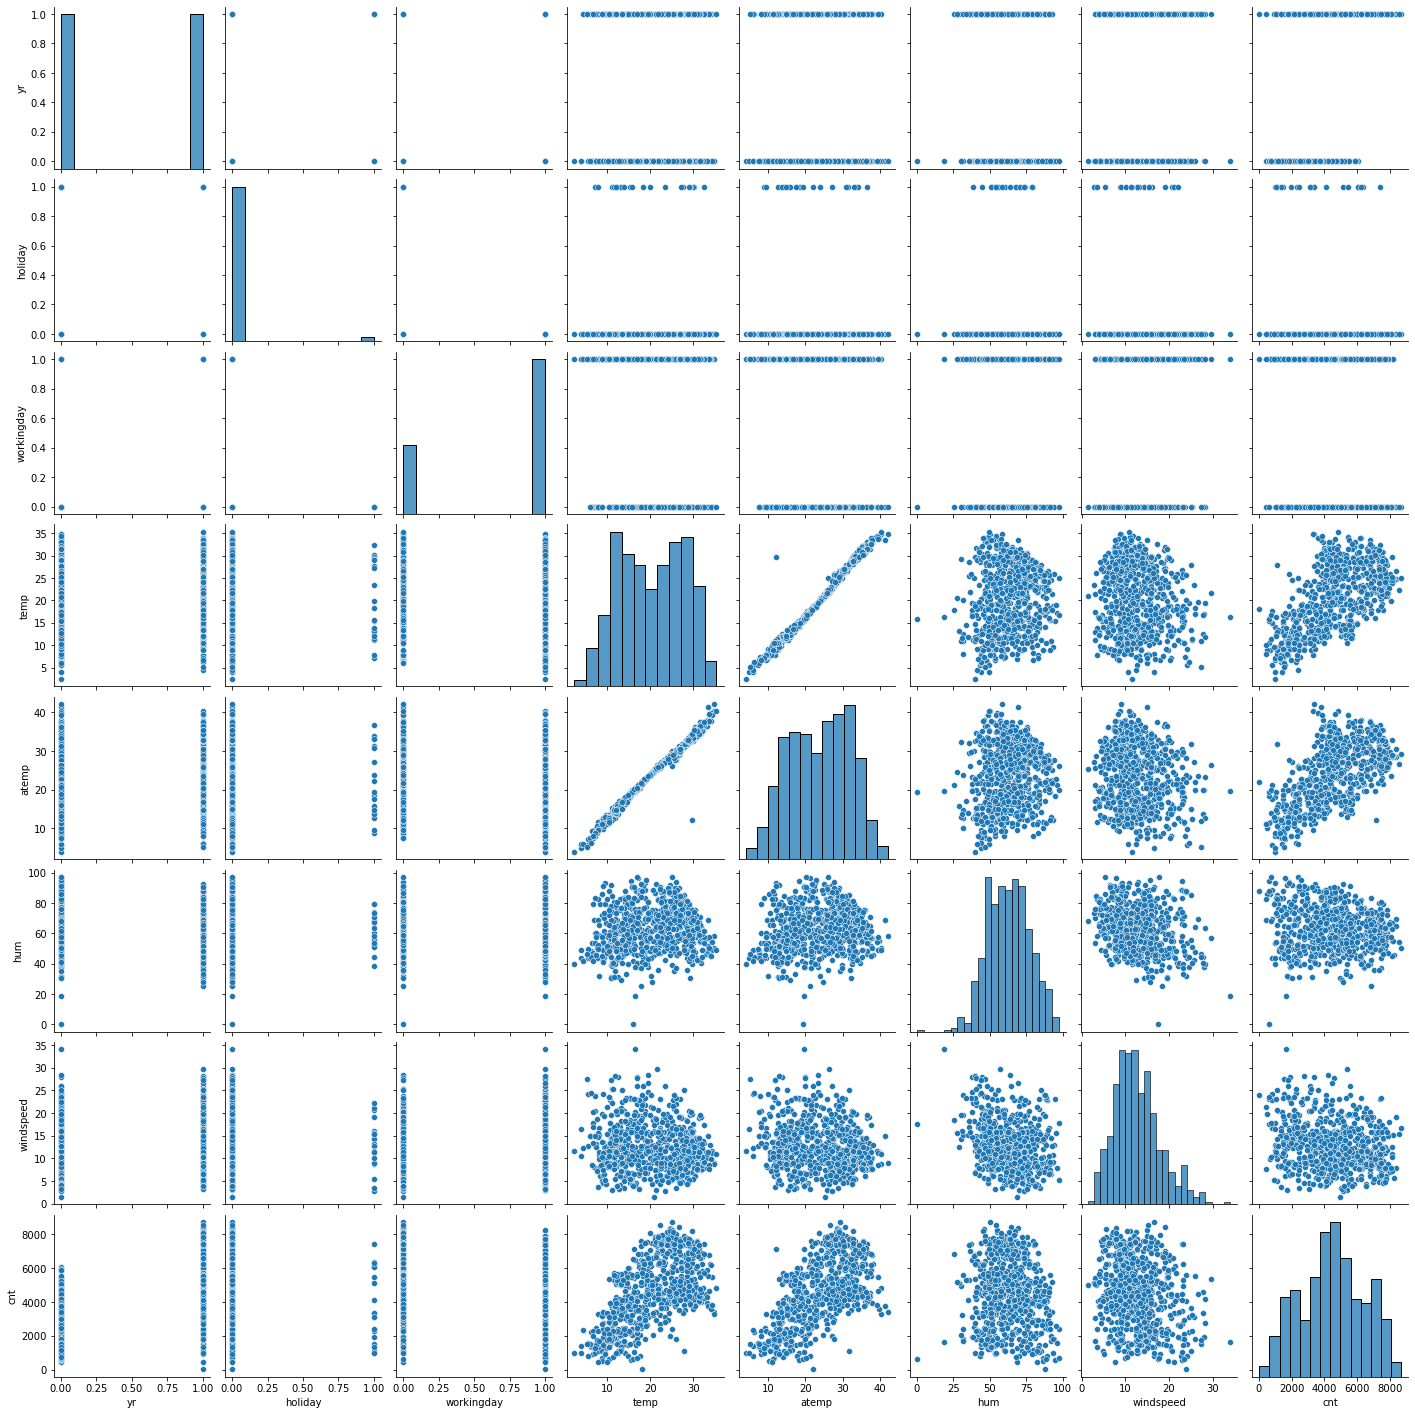

In [28]:
#scatter plot just for the rough idea

sns.pairplot(bike_share)
plt.show()

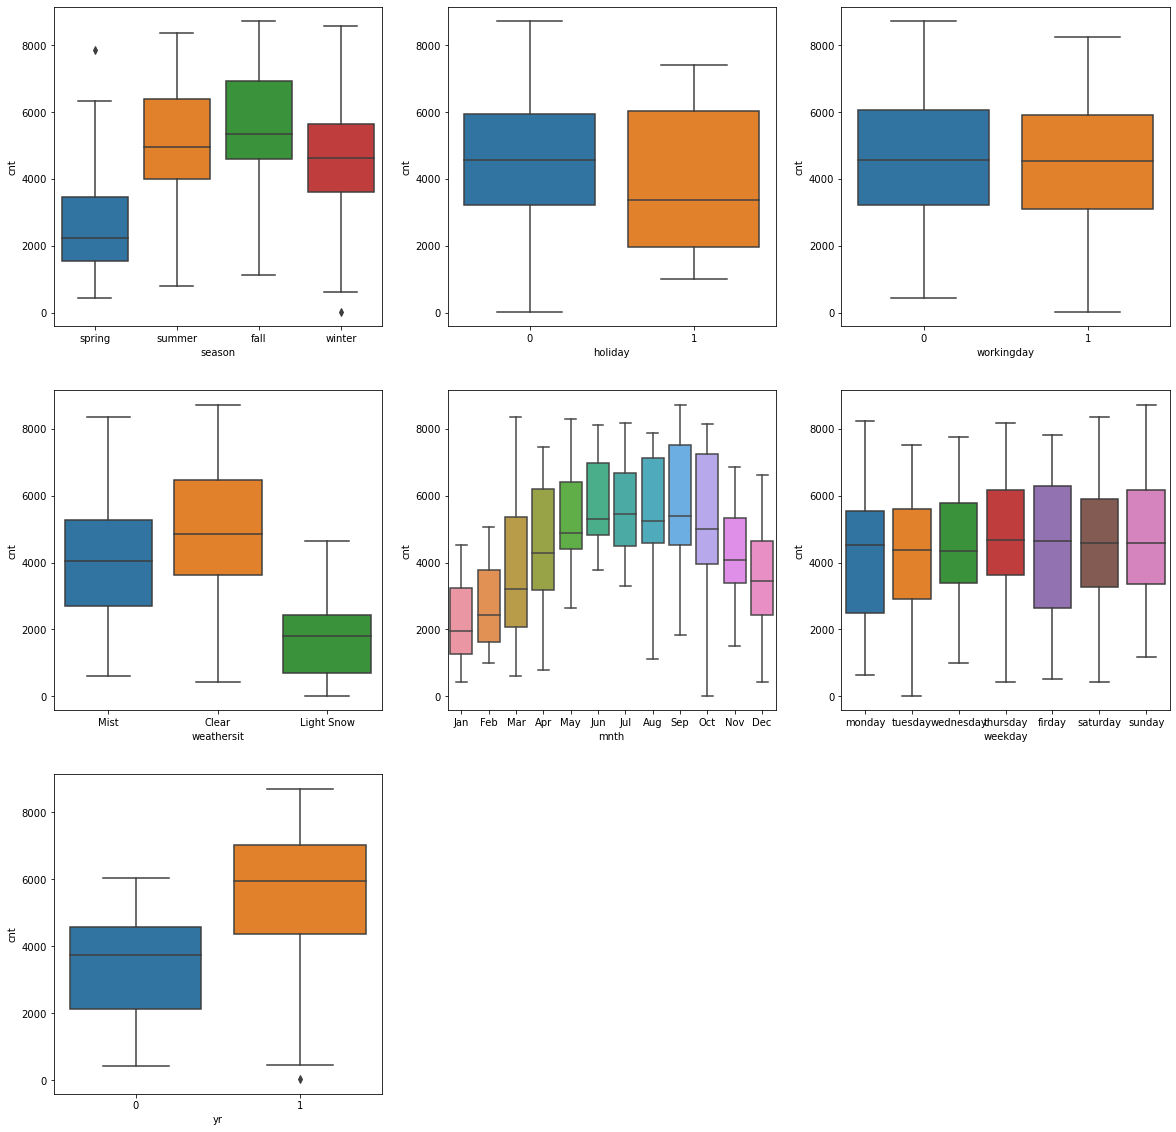

In [29]:
#catagorical data representation via box plot


plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=bike_share)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=bike_share)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=bike_share)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=bike_share)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=bike_share)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=bike_share)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=bike_share)
plt.show()

### 
-shows that there are no outliners

-shows that there is no much difference whether it is holiday or not

-it is showing that bike are more used in fall season

-more bike are used in 2019

-ppl prefer bikes in clear weather




In [30]:
#numberical data representation

bike_share_numeric = bike_share.select_dtypes(include=['float64','int64'])
bike_share_numeric.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


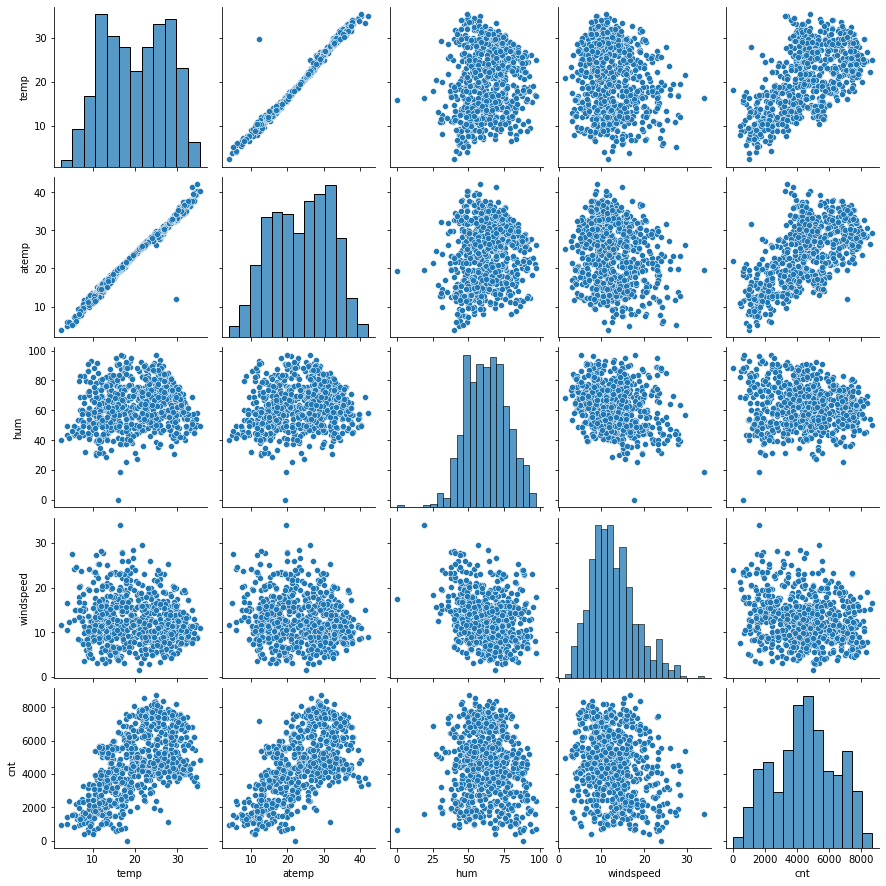

In [31]:
sns.pairplot(bike_share_numeric)
plt.show()

#### The plot of temp and atemp is almost same hence one can be dropper as it seems irrelevant

In [32]:
bike_share.drop(['atemp'],axis=1, inplace=True)

In [33]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    float64
dtypes: float64(4), object(7)
memory usage: 62.9+ KB


In [34]:
#correlation matrix

b=bike_share.corr()
b

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


<AxesSubplot:>

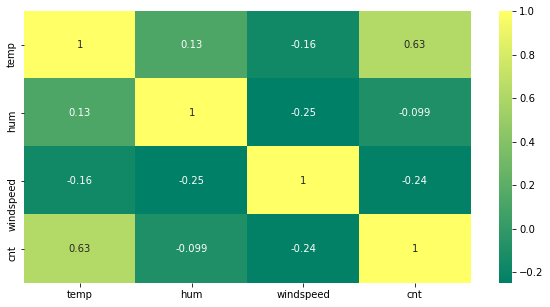

In [35]:
#creating heat map of the coorelation for better understanding

plt.figure(figsize=(10,5))
sns.heatmap(b,annot=True,cmap='summer' ,annot_kws={"size":10})

#### understaning
-temp and cnt has some relation


# Creating dummy variables

In [36]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,Mist,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,tuesday,1,Mist,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,wednesday,1,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,thursday,1,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,firday,1,Clear,9.305237,43.6957,12.522300,1600.0


In [37]:
# the dummy varibles are to be created for the  categorical columns, there are 4 columns

bike_share_dummy=pd.get_dummies(bike_share[['season','mnth','weekday','weathersit']],drop_first=True)

In [38]:
bike_share_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#concating both the dataframes

bike_share=pd.concat([bike_share,bike_share_dummy],axis=1)

In [40]:
bike_share=bike_share.drop(['season','mnth','weekday','weathersit'],axis=1)

In [41]:
bike_share.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    object 
 1   holiday                730 non-null    object 
 2   workingday             730 non-null    object 
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    float64
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

# Model Building

### Data split

In [43]:
#Splitting into train & test sets

df_train, df_test = train_test_split(bike_share, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
df_train.shape

(510, 29)

In [45]:
df_test.shape

(219, 29)

### Rescaling

In [46]:
#scaleing the continuous variables
num_vars = ['temp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [47]:
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####    
All the values are between 0 & 1

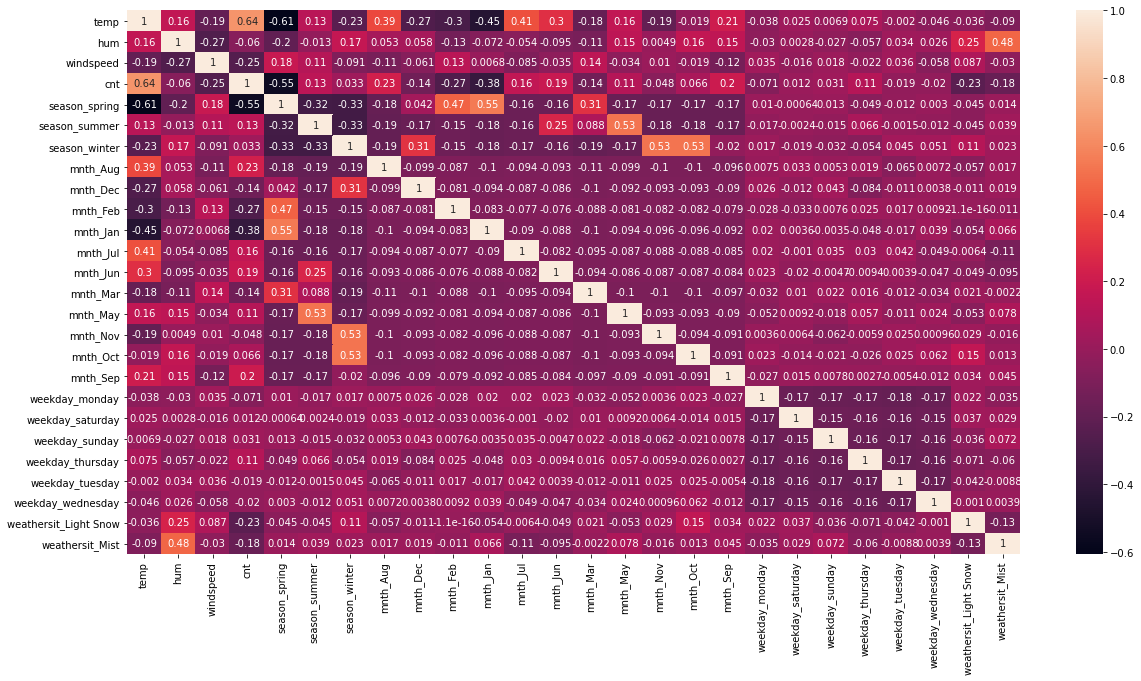

In [48]:
#heatmaps for overview
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr() ,annot=True)
plt.show()

In [49]:
#the cnt column is removed from y_train as it would be y axis as the main purpose of the model is to get the count 
y_train=df_train.pop('cnt')
X_train=df_train

In [50]:
bike_share.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

<AxesSubplot:>

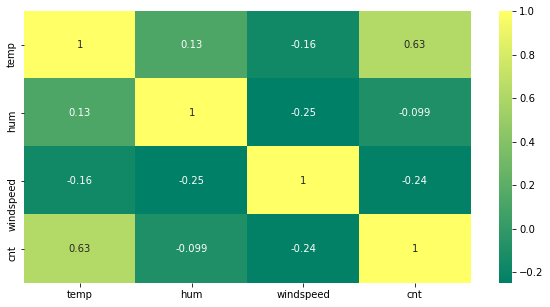

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(b,annot=True,cmap='summer' ,annot_kws={"size":10})

In [52]:
# model 1
# the first mode is made using temp columns as it was most correalted(0.63) as per the heat map

X_train_sm=sm.add_constant(X_train['temp'])

bike1=sm.OLS(y_train,X_train_sm)

#fit
bike1_mod=bike1.fit()

bike1_mod.params

const    0.169798
temp     0.639952
dtype: float64

In [53]:
bike1_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           5.80e-61
Time:                        23:23:08   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#model 2 using mnth_Jul as it has 0.41 corrleation


X_train_sm=X_train[['temp','mnth_Jul']]
X_train_sm=sm.add_constant(X_train_sm)

bike1=sm.OLS(y_train,X_train_sm)

#fit
bike1_mod=bike1.fit()

bike1_mod.params



const       0.149284
temp        0.693878
mnth_Jul   -0.110607
dtype: float64

In [55]:
bike1_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           2.72e-62
Time:                        23:23:08   Log-Likelihood:                 181.11
No. Observations:                 510   AIC:                            -356.2
Df Residuals:                     507   BIC:                            -343.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.020      7.355      0.000       0.109       0.189
temp           0.6939      0.037     18.916      0.000       0.622       0.766
mnth_Jul      -0.1106      0.031     -3.551      0.000      -0.172      -0.049
==============================================================================
Omnibus:                        5.421   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.902
Skew:                           0.065   Prob(JB):                        0.142
Kurtosis:                       2.592   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#model3  using mnth_Aug as it has 0.39 corrleation


X_train_sm=X_train[['temp','mnth_Jul','mnth_Aug']]
X_train_sm=sm.add_constant(X_train_sm)

bike1=sm.OLS(y_train,X_train_sm)

#fit
bike1_mod=bike1.fit()

bike1_mod.params

const       0.136227
temp        0.730598
mnth_Jul   -0.129197
mnth_Aug   -0.054649
dtype: float64

In [57]:
bike1_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     128.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           7.30e-62
Time:                        23:23:08   Log-Likelihood:                 182.89
No. Observations:                 510   AIC:                            -357.8
Df Residuals:                     506   BIC:                            -340.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1362      0.021      6.365      0.000       0.094       0.178
temp           0.7306      0.041     17.620      0.000       0.649       0.812
mnth_Jul      -0.1292      0.033     -3.963      0.000      -0.193      -0.065
mnth_Aug      -0.0546      0.029     -1.883      0.060      -0.112       0.002
==============================================================================
Omnibus:                        8.105   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.089
Skew:                           0.046   Prob(JB):                       0.0785
Kurtosis:                       2.520   Cond. No.                         7.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 
it does not have much affect on the model 


#### We can try adding all the colums and removing where the p-values are high


In [58]:
#model4 with all the columns 

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:08   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [59]:
#model5 with all the columns 

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:08   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [60]:
X_train=X_train.astype(float)

In [61]:
# VIF for calculating the multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.89
3,temp,43.99
4,hum,41.17
6,season_spring,13.54
8,season_winter,12.51
22,weekday_sunday,12.35
21,weekday_saturday,11.83
7,season_summer,9.84
17,mnth_Nov,7.16
18,mnth_Oct,6.96


In [62]:
# the higest p-value is 0.980 for mnth_Mar hence dropping that

X=X_train.drop('mnth_Mar',axis=1)


In [63]:
#model6 with all the columns-1(mnth_Mar)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [64]:
# the next hige p-value is 0.969 for mnth_Jun hence dropping that
X=X.drop('mnth_Jun',axis=1)

In [65]:
#X.info()


In [66]:
#model7 with all the columns-2(mnth_Mar,mnth_Jun)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [67]:
# the next hige p-value is 0.873 for mnth_Oct hence dropping that
X=X.drop('mnth_Oct',axis=1)


In [68]:
#X.info()


In [69]:
#model8 with all the columns-3(mnth_Mar,mnth_Jun,mnth_Oct)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [70]:
#dropping weekday_thursday with p=value of 0.796
X=X.drop('weekday_thursday',axis=1)

In [71]:
#X.info()

In [72]:
#model9 with all the columns-4(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [73]:
# the next hige p-value is 0.527 for mnth_Aug hence dropping that
X=X.drop('mnth_Aug',axis=1)


In [74]:
#X.info()

In [75]:
#model10 with all the columns-5(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [76]:
# the next hige p-value is 0.485 for weekday_sunday hence dropping that
X=X.drop('weekday_sunday',axis=1)

In [77]:
#X.info()

In [78]:
#model11 with all the columns-6(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [79]:
# the next hige p-value is 0.432 for weekday_saturday hence dropping that
X=X.drop('weekday_saturday',axis=1)

In [80]:
#X.info()

In [81]:
#model12 with all the columns-7(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday,weekday_saturday)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [82]:
# the next hige p-value is 0.395 for workingday hence dropping that
X=X.drop('workingday',axis=1)

In [83]:
#model13 with all the columns-8(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday,weekday_saturday,workingday)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [84]:
# the hige p-value is 0.462 for weekday_wednesday hence dropping that
X=X.drop('weekday_wednesday',axis=1)

In [85]:
#model14 with all the columns-9(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday,weekday_saturday,workingday,weekday_wednesday)

X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [86]:
# the hige p-value is 0.257 for mnth_May hence dropping that
X=X.drop('mnth_May',axis=1)

In [87]:
#model15 with all the columns-10(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday,weekday_saturday,
#workingday,weekday_wednesday,mnth_May)


X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [88]:
# the hige p-value is 0.263 for mnth_Feb hence dropping that
X=X.drop('mnth_Feb',axis=1)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    float64
 1   holiday                510 non-null    float64
 2   temp                   510 non-null    float64
 3   hum                    510 non-null    float64
 4   windspeed              510 non-null    float64
 5   season_spring          510 non-null    float64
 6   season_summer          510 non-null    float64
 7   season_winter          510 non-null    float64
 8   mnth_Dec               510 non-null    float64
 9   mnth_Jan               510 non-null    float64
 10  mnth_Jul               510 non-null    float64
 11  mnth_Nov               510 non-null    float64
 12  mnth_Sep               510 non-null    float64
 13  weekday_monday         510 non-null    float64
 14  weekday_tuesday        510 non-null    float64
 15  weath

In [90]:
#model15 with all the columns-11(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday,weekday_saturday,
#workingday,weekday_wednesday,mnth_May.mnth_Feb)


X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [91]:
# the hige p-value is 0.258 for mnth_Nov hence dropping that
X=X.drop('mnth_Nov',axis=1)


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    float64
 1   holiday                510 non-null    float64
 2   temp                   510 non-null    float64
 3   hum                    510 non-null    float64
 4   windspeed              510 non-null    float64
 5   season_spring          510 non-null    float64
 6   season_summer          510 non-null    float64
 7   season_winter          510 non-null    float64
 8   mnth_Dec               510 non-null    float64
 9   mnth_Jan               510 non-null    float64
 10  mnth_Jul               510 non-null    float64
 11  mnth_Sep               510 non-null    float64
 12  weekday_monday         510 non-null    float64
 13  weekday_tuesday        510 non-null    float64
 14  weathersit_Light Snow  510 non-null    float64
 15  weath

In [93]:
#model15 with all the columns-11(mnth_Mar,mnth_Jun,mnth_Oct,weekday_thursday,mnth_Aug,weekday_sunday,weekday_saturday,
#workingday,weekday_wednesday,mnth_May.mnth_Feb,mnth_Nov)


X_train_sm=sm.add_constant(X_train)

bike1=sm.OLS(y_train,X_train_sm.astype(float))

bike1_model=bike1.fit()

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.33e-179
Time:                        23:23:10   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                  0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                 -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                 -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                 -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                 -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                  0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                 -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                  0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep                  0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist          -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [94]:
# VIF for calculating the multicollinearity

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.64
2,temp,17.40
4,windspeed,4.70
5,season_spring,4.35
7,season_winter,3.46
6,season_summer,2.79
15,weathersit_Mist,2.32
0,yr,2.09
9,mnth_Jan,1.74
10,mnth_Jul,1.60


In [95]:
#higest VIF is 30.64 of hum hence dropping it
X=X.drop('hum',axis=1)
#X=X.drop('hum',axis=1)

In [96]:
# Calculating The VIF for calculating the multicollinearity

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.20
3,windspeed,4.65
4,season_spring,2.91
5,season_summer,2.24
6,season_winter,2.11
0,yr,2.08
8,mnth_Jan,1.65
9,mnth_Jul,1.60
14,weathersit_Mist,1.56
10,mnth_Sep,1.34


In [97]:
#model16 dropping the higest vif

X_train_sm=sm.add_constant(X)

# Create  Model

bike=sm.OLS(y_train,X_train_sm.astype(float))

# fit

bike1_model=bike.fit()

# summary

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.13e-186
Time:                        23:23:10   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2362      0.031      7.607      0.000       0.175       0.297
yr                        0.2341      0.008     28.817      0.000       0.218       0.250
holiday                  -0.1009      0.026     -3.916      0.000      -0.152      -0.050
temp                      0.4563      0.035     13.098      0.000       0.388       0.525
windspeed                -0.1547      0.025     -6.159      0.000      -0.204      -0.105
season_spring            -0.0624      0.021     -2.969      0.003      -0.104      -0.021
season_summer             0.0401      0.015      2.640      0.009       0.010       0.070
season_winter             0.0816      0.017      4.721      0.000       0.048       0.116
mnth_Dec                 -0.0298      0.016     -1.842      0.066      -0.062       0.002
mnth_Jan                 -0.0449      0.018     -2.478      0.014      -0.081      -0.009
mnth_Jul                 -0.0458      0.018     -2.486      0.013      -0.082      -0.010
mnth_Sep                  0.0746      0.017      4.437      0.000       0.042       0.108
weekday_monday           -0.0261      0.011     -2.295      0.022      -0.048      -0.004
weekday_tuesday          -0.0314      0.011     -2.745      0.006      -0.054      -0.009
weathersit_Light Snow    -0.2919      0.024    -11.946      0.000      -0.340      -0.244
weathersit_Mist          -0.0816      0.009     -9.430      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       64.149   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.382
Skew:                          -0.667   Prob(JB):                     2.21e-33
Kurtosis:                       5.301   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#dropping the temp value as it is also high
#X=X.drop('temp',axis=1)

In [99]:
#model17 dropping the higest vif

X_train_sm=sm.add_constant(X)

# Create  Model

bike=sm.OLS(y_train,X_train_sm.astype(float))

# fit

bike1_model=bike.fit()

# summary

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.13e-186
Time:                        23:23:10   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2362      0.031      7.607      0.000       0.175       0.297
yr                        0.2341      0.008     28.817      0.000       0.218       0.250
holiday                  -0.1009      0.026     -3.916      0.000      -0.152      -0.050
temp                      0.4563      0.035     13.098      0.000       0.388       0.525
windspeed                -0.1547      0.025     -6.159      0.000      -0.204      -0.105
season_spring            -0.0624      0.021     -2.969      0.003      -0.104      -0.021
season_summer             0.0401      0.015      2.640      0.009       0.010       0.070
season_winter             0.0816      0.017      4.721      0.000       0.048       0.116
mnth_Dec                 -0.0298      0.016     -1.842      0.066      -0.062       0.002
mnth_Jan                 -0.0449      0.018     -2.478      0.014      -0.081      -0.009
mnth_Jul                 -0.0458      0.018     -2.486      0.013      -0.082      -0.010
mnth_Sep                  0.0746      0.017      4.437      0.000       0.042       0.108
weekday_monday           -0.0261      0.011     -2.295      0.022      -0.048      -0.004
weekday_tuesday          -0.0314      0.011     -2.745      0.006      -0.054      -0.009
weathersit_Light Snow    -0.2919      0.024    -11.946      0.000      -0.340      -0.244
weathersit_Mist          -0.0816      0.009     -9.430      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       64.149   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.382
Skew:                          -0.667   Prob(JB):                     2.21e-33
Kurtosis:                       5.301   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### This reduses the R-squared hence not useful

In [100]:
#dropping the temp value as it is also high
#X=X.drop('windspeed',axis=1)

In [101]:
#model18 dropping the higest vif

X_train_sm=sm.add_constant(X)

# Create  Model

bike=sm.OLS(y_train,X_train_sm.astype(float))

# fit

bike1_model=bike.fit()

# summary

bike1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.13e-186
Time:                        23:23:10   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2362      0.031      7.607      0.000       0.175       0.297
yr                        0.2341      0.008     28.817      0.000       0.218       0.250
holiday                  -0.1009      0.026     -3.916      0.000      -0.152      -0.050
temp                      0.4563      0.035     13.098      0.000       0.388       0.525
windspeed                -0.1547      0.025     -6.159      0.000      -0.204      -0.105
season_spring            -0.0624      0.021     -2.969      0.003      -0.104      -0.021
season_summer             0.0401      0.015      2.640      0.009       0.010       0.070
season_winter             0.0816      0.017      4.721      0.000       0.048       0.116
mnth_Dec                 -0.0298      0.016     -1.842      0.066      -0.062       0.002
mnth_Jan                 -0.0449      0.018     -2.478      0.014      -0.081      -0.009
mnth_Jul                 -0.0458      0.018     -2.486      0.013      -0.082      -0.010
mnth_Sep                  0.0746      0.017      4.437      0.000       0.042       0.108
weekday_monday           -0.0261      0.011     -2.295      0.022      -0.048      -0.004
weekday_tuesday          -0.0314      0.011     -2.745      0.006      -0.054      -0.009
weathersit_Light Snow    -0.2919      0.024    -11.946      0.000      -0.340      -0.244
weathersit_Mist          -0.0816      0.009     -9.430      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       64.149   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.382
Skew:                          -0.667   Prob(JB):                     2.21e-33
Kurtosis:                       5.301   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### This is also not useful hence the model16 is the best fit

### R-squared	0.842 and Adj. R-squared 0.837

## Residual Analysis

In [102]:
y_train_pred=bike1_model.predict(X_train_sm)

In [103]:
y_train_pred.head()

653    0.738093
576    0.755492
426    0.488628
728    0.361298
482    0.580205
dtype: float64

In [104]:
res=y_train-y_train_pred

<AxesSubplot:ylabel='Density'>

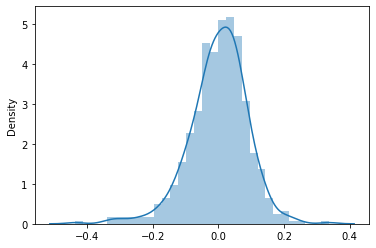

In [105]:
sns.distplot(res)  #normally distributed

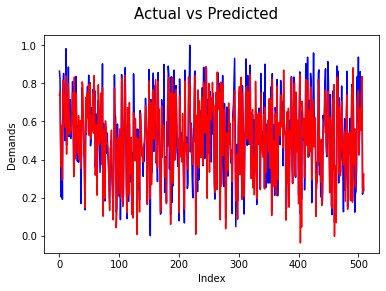

In [106]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Making Predictions on the Test Set and Evaluating it.

In [107]:
# 1. Fit this MinMax Scaler on the numerical columns except for the dummy vars.

num_vars=['temp','hum','windspeed','cnt']

# 2. Transform on Data (all the values lies between 0 and 1)

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [108]:
df_test.describe()


,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
y_test=df_test.pop('cnt')

X_test=df_test

In [110]:
X_test_sm=sm.add_constant(X_test)


In [111]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow,weathersit_Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [112]:
#Dropping the uncessary columns

X_test_sm=X_test_sm.drop(['mnth_Mar','mnth_Jun','mnth_Oct','weekday_thursday','mnth_Aug','weekday_sunday','weekday_saturday','workingday','weekday_wednesday','mnth_May','mnth_Feb','mnth_Nov','hum'],axis=1)

In [113]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    object 
 2   holiday                219 non-null    object 
 3   temp                   219 non-null    float64
 4   windspeed              219 non-null    float64
 5   season_spring          219 non-null    uint8  
 6   season_summer          219 non-null    uint8  
 7   season_winter          219 non-null    uint8  
 8   mnth_Dec               219 non-null    uint8  
 9   mnth_Jan               219 non-null    uint8  
 10  mnth_Jul               219 non-null    uint8  
 11  mnth_Sep               219 non-null    uint8  
 12  weekday_monday         219 non-null    uint8  
 13  weekday_tuesday        219 non-null    uint8  
 14  weathersit_Light Snow  219 non-null    uint8  
 15  weath

In [114]:
#Predictions

y_test_pred =bike1_model.predict(X_test_sm)

In [115]:
# Evaluation of the model

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8102450942895766

## The r2_score on the test set is 0.81 and on the train set it is 0.84 showing that the result is good to procced with